# Settling up the various dependencies

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

# A list of Stopwords taken from Internet

In [2]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

# Loading the Values,by iteratively reading files from all Folders (Categories)

In [105]:
'''
X is a List which consists of Tuples as its elements,these Tuples
consist of two values ,the Tuple is in the following manner:
(Document name,text in that Document)

Y is a List that consists of the categories as it elements.

'''

X  =[] 
Y = []
for category in os.listdir("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups"):
    if(category=='.DS_Store'):continue
    for document in os.listdir("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/"+category):
        with open("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/"+category+'/'+document, "r",encoding='ISO-8859-1') as f:
            X.append((document,f.read()))
            Y.append(category)

In [106]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('75895', 'Newsgroups: talk.politics.mideast\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!brunix!doorknob!hm\nFrom: hm@cs.brown.edu (Harry Mamaysky)\nSubject: Heil Hernlem \nIn-Reply-To: hernlem@chess.ncsu.edu\'s message of Wed, 14 Apr 1993 12:58:13 GMT\nMessage-ID: <HM.93Apr15112701@yoda.cs.brown.edu>\nSender: news@cs.brown.edu\nOrganization: Dept. of Computer Science, Brown University\nReferences: <1993Apr14.125813.21737@ncsu.edu>\nDate: Thu, 15 Apr 1993 16:27:01 GMT\nLines: 24\n\nIn article <1993Apr14.125813.21737@ncsu.edu> hernlem@chess.ncsu.edu (Brad Hernlem) writes:\n\n   Lebanese resistance forces detonated a bomb under an Israeli occupation\n   patrol in Lebanese territory two days ago. Three soldiers were killed and\n   two wounded. In "retaliation", Israeli and Israeli-backed forces wounded\

# Splitting of the Data into Train and Test Data

In [107]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [108]:
'''
The data has been splitted in nearly 3:1 ratio [Train:Test]

'''
print(len(x_train))
print(len(x_test))

14997
5000


In [130]:
'''
Here we have demonstrated the Splitting of the text using the 
re.split Function

'''
sample_text="My name is Iron Man !! What is your name?"
print(re.split(r'\W+',sample_text))

['My', 'name', 'is', 'Iron', 'Man', 'What', 'is', 'your', 'name', '']


# Here we are creating a Dictionary which has the words as it's Keys and thier occurances as its Value

In [110]:
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #We will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15288,
 'cantaloupe': 19527,
 'srv': 24242,
 'cmu': 39204,
 'edu': 122856,
 'das': 4576,
 'news': 25701,
 'harvard': 5232,
 'ogicse': 611,
 'sdd': 1046,
 'com': 37770,
 'usc': 2190,
 'not': 25030,
 'mail': 3271,
 'msmilor': 2,
 'skat': 6,
 'mark': 1393,
 'smilor': 3,
 'newsgroups': 15286,
 'sci': 6490,
 'space': 3375,
 'subject': 16097,
 'summer': 250,
 'internships': 5,
 'message': 16404,
 'date': 15547,
 'apr': 15341,
 'gmt': 13338,
 'article': 10010,
 'sender': 8228,
 'nntp': 7039,
 'organization': 14873,
 'university': 7454,
 'southern': 224,
 'california': 790,
 'los': 364,
 'angeles': 323,
 'lines': 15636,
 'posting': 7332,
 'host': 6722,
 'folks': 427,
 'exactly': 713,
 'certain': 703,
 'best': 1767,
 'place': 1313,
 'ask': 1006,
 'searching': 82,
 'internship': 5,
 'engineering': 884,
 'will': 11389,
 'graduating': 6,
 'early': 703,
 'may': 6068,
 'aerospace': 75,
 'pursuing': 35,
 'masters': 53,
 'fall': 358,
 'anyone': 3253,
 'know': 6864,
 'anything': 1891,
 'availa

In [111]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122856),
 ('cmu', 39204),
 ('com', 37770),
 ('news', 25701),
 ('not', 25030),
 ('srv', 24242),
 ('cantaloupe', 19527),
 ('net', 19046),
 ('message', 16404),
 ('subject', 16097),
 ('lines', 15636),
 ('date', 15547),
 ('apr', 15341),
 ('path', 15288),
 ('newsgroups', 15286),
 ('organization', 14873),
 ('can', 14809),
 ('state', 14208),
 ('gmt', 13338),
 ('ohio', 11980),
 ('one', 11899),
 ('will', 11389),
 ('writes', 10990),
 ('article', 10010),
 ('references', 9788),
 ('comp', 9697),
 ('talk', 9249),
 ('misc', 8888),
 ('ans', 8317),
 ('howland', 8249),
 ('sender', 8228),
 ('reston', 8218),
 ('don', 7875),
 ('people', 7855),
 ('like', 7808),
 ('just', 7527),
 ('university', 7454),
 ('posting', 7332),
 ('nntp', 7039),
 ('mps', 6947),
 ('know', 6864),
 ('host', 6722),
 ('sci', 6490),
 ('get', 6385),
 ('think', 6291),
 ('zaphod', 6258),
 ('usenet', 6176),
 ('may', 6068),
 ('alt', 5994),
 ('politics', 5863),
 ('windows', 5799),
 ('also', 5621),
 ('time', 5304),
 ('harvard', 5232),
 (

In [112]:
import matplotlib.pyplot as plt

# Now we'll have to plot a graph inorder to know the number of features we want to take

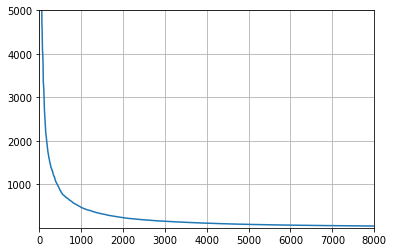

In [142]:
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [114]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'path',
 'newsgroups',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'time',
 'harvard',
 'near',
 'rutgers',
 'eng',
 'use',
 'new',
 'rec',
 'soc',
 'noc',
 'crabapple',
 'sei',
 'good',
 'well',
 'das',
 'xref',
 'system',
 'cis',
 'even',
 'god',
 'now',
 'way',
 'see',
 'europa',
 'gtefsd',
 'world',
 'ece',
 'uunet',
 'religion',
 'org',
 'say',
 'many',
 'two',
 'christian',
 'make',
 'first',
 'much',
 'gov',
 'rochester',
 'right',
 'distribution',
 'club',
 'space',
 'said',
 'culture',
 'magnesium',
 'utexas',
 'andrew',
 'gatech',

In [115]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [116]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [117]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 8  1  1 ...  0  0  0]
 [ 7  4  2 ...  0  0  0]
 [ 6  3  6 ...  0  0  0]
 ...
 [ 4  2  4 ...  0  0  0]
 [ 2  1  1 ...  0  0  0]
 [11  4  0 ...  0  0  0]]
--------------------------
[[ 7  1  4 ...  0  0  0]
 [ 9  5  7 ...  0  0  0]
 [ 6  2  3 ...  0  0  0]
 ...
 [ 9  1  5 ...  0  0  0]
 [ 5  2  1 ...  0  0  0]
 [17  4  0 ...  0  0  0]]


# Implementation of Multinomial Naive Bayes (sklearn)

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Demonstrating confusion-matrix and classification report

# Respective Scores:

In [119]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8965793158631726
Score on testing data: 0.8556
[[194   0   1   0   0   0   1   0   1   0   0   0   0   1   0   0   0   0
    0  45]
 [  0 198  14  13   3  10   5   1   2   2   0   0   5   2   2   0   0   0
    0   0]
 [  0   3 188  13   3  15   2   0   0   0   0   0   0   1   1   0   0   0
    0   0]
 [  0   6   9 202  35   1   7   0   0   0   0   1   4   0   0   0   0   0
    0   0]
 [  0   2   1  24 218   3   7   0   0   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  22  10   3   6 204   7   1   1   0   0   0   3   1   2   0   0   0
    0   0]
 [  0   1   1   7   1   1 226   7   1   0   1   0   5   0   0   0   0   0
    0   0]
 [  0   1   0   1   1   0  13 213  11   0   1   0   6   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   4   7 240   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   2   5 249   5   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   1   2  13 236   0   0   1   0   0   0   0
   

# Self Implementation of Naive Baye's

In [120]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [121]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [122]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [123]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [124]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [125]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [126]:
dictionary

{'total_doc': 14997,
 'sci.med': {'edu': 6171,
  'cmu': 1948,
  'com': 2085,
  'news': 1159,
  'not': 1299,
  'srv': 1186,
  'cantaloupe': 922,
  'net': 819,
  'message': 777,
  'subject': 789,
  'lines': 740,
  'date': 766,
  'apr': 755,
  'path': 747,
  'newsgroups': 745,
  'organization': 756,
  'can': 794,
  'state': 695,
  'gmt': 675,
  'ohio': 614,
  'one': 638,
  'will': 511,
  'writes': 509,
  'article': 552,
  'references': 524,
  'comp': 36,
  'talk': 38,
  'misc': 163,
  'ans': 376,
  'howland': 368,
  'sender': 401,
  'reston': 368,
  'don': 342,
  'people': 366,
  'like': 369,
  'just': 323,
  'university': 384,
  'posting': 308,
  'nntp': 293,
  'mps': 371,
  'know': 360,
  'host': 277,
  'sci': 1685,
  'get': 338,
  'think': 268,
  'zaphod': 325,
  'usenet': 269,
  'may': 309,
  'alt': 218,
  'politics': 17,
  'windows': 18,
  'also': 375,
  'time': 283,
  'harvard': 319,
  'near': 190,
  'rutgers': 26,
  'eng': 281,
  'use': 338,
  'new': 348,
  'rec': 165,
  'soc': 9,


In [127]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

# Respective Score:

In [144]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.87
[[212   0   1   0   0   0   0   1   1   0   0   0   0   1   0   0   0   0
    0  27]
 [  0 219   6   8   3   5   2   2   1   1   0   1   7   2   0   0   0   0
    0   0]
 [  0  12 174  18   2  16   1   0   0   0   0   0   0   1   1   0   0   0
    1   0]
 [  0   4   3 218  31   0   6   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   6   0  22 222   2   5   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  23  13   4   3 212   2   1   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   0   0   7   4   1 225   7   0   0   0   0   5   2   0   0   0   0
    0   0]
 [  0   2   0   0   0   0  11 220   6   0   0   0   8   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   1   7 244   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   2 254   7   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   0   0   8 243   0   0   1   0   0   0   0
    0   0]
 [  0   4   0   0   1   3   0   0   0

# RESULT:



We have performed Text-Classification both by sklearn and self implementation.

We found out that sklearn Multinomial Naive Bayes gave score of 0.8556 on testing_data,whereas self implemented Naive Bayes classifier gave 0.87 on testing data.
